In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import classification_report

In [5]:
from src.load_data import load_data

In [6]:
def plot_figures(sets, title=None):
    plt.figure(figsize=(15, 3))
    if title:
        plt.suptitle(title, fontsize=16, y=1.08)
    plt.subplot(131)
    plt.hist(sets[0], bins=50)
    plt.title('Train')
    plt.subplot(132)
    plt.hist(sets[1], bins=50)
    plt.title('Valid')
    plt.subplot(133)
    plt.hist(sets[2], bins=50)
    plt.title('Test')
    plt.show()

### Load Data


In [7]:
train_data, valid_data, test_data, metadata = load_data()

#### Lower-bound Performances

In [8]:
y_true = [sentence['label'] for article in test_data
          for sentence in article['sentences']]

In [9]:
y_preds_0 = [0]*len(y_true) # if all preds are 0
y_preds_1 = [1]*len(y_true) # if all preds are 1

In [11]:
print("When classifiers predict as all '0'\n")
print(classification_report(y_true, y_preds_0))

When classifiers predict as all '0'

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       325
           1       0.00      0.00      0.00       116

   micro avg       0.74      0.74      0.74       441
   macro avg       0.37      0.50      0.42       441
weighted avg       0.54      0.74      0.63       441



In [12]:
print("When classifiers predict as all '1'\n")
print(classification_report(y_true, y_preds_1))

When classifiers predict as all '1'

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       325
           1       0.26      1.00      0.42       116

   micro avg       0.26      0.26      0.26       441
   macro avg       0.13      0.50      0.21       441
weighted avg       0.07      0.26      0.11       441



#### Number of Sentences

In [ ]:
def get_num_sents(data_):
    return [len(article['sentences']) for article in data_]

In [13]:
print('Max number of sentences in an article:',
      max([len(article['sentences']) for article in (train_data + valid_data + test_data)]))

Max number of sentences in an article: 58


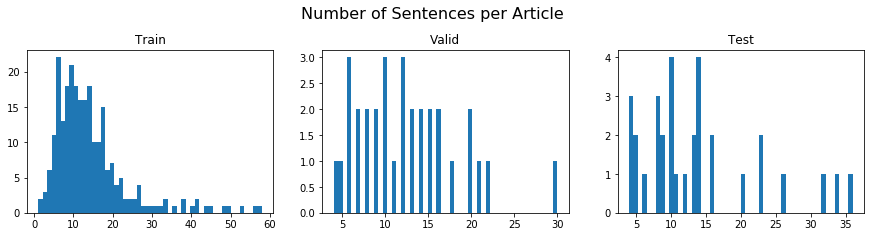

In [14]:
plot_figures([
    get_num_sents(train_data),
    get_num_sents(valid_data),
    get_num_sents(test_data)
], 'Number of Sentences per Article')

#### Sentence Lengths based on Chars

In [44]:
print("Char-based length of the longest sentence:", 
      max([len(sentence['sentence']) 
           for article in (train_data + valid_data + test_data)
           for sentence in article['sentences']]))

Char-based length of the longest sentence: 639


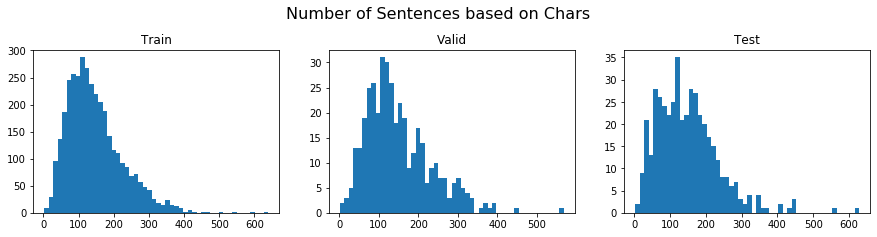

In [16]:
plot_figures([
    [len(sent['sentence']) for article in train_data for sent in article['sentences']],
    [len(sent['sentence']) for article in valid_data for sent in article['sentences']],
    [len(sent['sentence']) for article in test_data for sent in article['sentences']]
], 'Number of Sentences based on Chars')

#### Sentence Lengths based on Tokens

In [46]:
print("Token-based length of the longest sentence:", 
      max([len(sentence['sentence'].split()) 
           for article in (train_data + valid_data + test_data)
           for sentence in article['sentences']]))

Token-based length of the longest sentence: 105


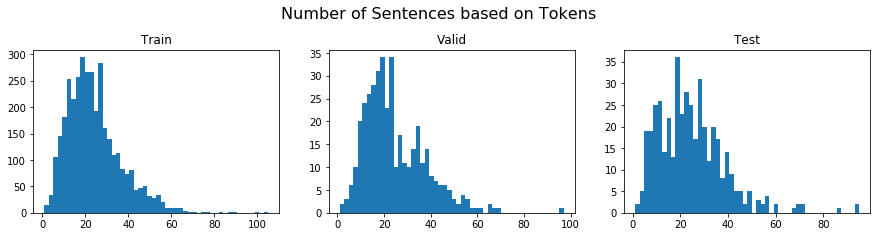

In [15]:
plot_figures([
    [len(sent['sentence'].split()) for article in train_data for sent in article['sentences']],
    [len(sent['sentence'].split()) for article in valid_data for sent in article['sentences']],
    [len(sent['sentence'].split()) for article in test_data for sent in article['sentences']]
], 'Number of Sentences based on Tokens')

# Result Analysis

In [2]:
import pandas as pd

#### Elmo

In [17]:
runs = []
with open('/home/aorus/workspaces/simge/Master_Thesis/Model/Optimized_RQ1_elmo_model/model_performances.csv', 'r') as f:
    for line in f.readlines():
        
        if line != '\n' and 'f1' not in line:
            line = line.strip()
            line_list = line.split('_')
            scores = line_list[-1].split(',')
                      
            run = {
                'research_question': line_list[1],
                'transformer': line_list[2],
                'model': line_list[4],
                'optimizer': line_list[5],
                'learning_rate': line_list[7],
                'lrreduction': True if line_list[8] == 'lrreduction' else False,
                'loss': 'binary_crossentropy',
                'val_f1_macro': scores[1],
                'test_f1_macro': scores[2],
            }

            runs.append(run)

In [42]:
runs2 = [r for r in runs
#          if r['optimizer'] == 'rmsprop']
          if r['learning_rate'] == '0.01']

for run in runs2:
    
#      print('_'.join([run['model'], run['optimizer'], run['learning_rate']]))
#      print(run['val_f1_macro'])
     print(run['test_f1_macro'])

0.738378460602373
0.7454796502071142
0.7806455178512214
0.7454796502071142
0.7952461799660442
0.7483641483567378
0.792939431262206
0.7711145996860282
0.7403532608695651
0.7572886297376094
0.7679721367964727
0.7483641483567378
0.7688410017472336
0.7783219394496466
0.7493957463574302
0.6429444811632519
0.7295971549451223
0.6009400395343729
0.6533245987553226
0.7184158415841584
0.42428198433420367
0.7431172971978661
0.7375363819431422
0.7023076923076923
0.7302665464846767
0.7542815249266862
0.7347578347578347
0.7342880978865406
0.7376093294460642
0.7231682977079578
0.7363572260714943
0.7483641483567378
0.7411012235817576
0.7531071548538797
0.7316702160024338
0.738378460602373
0.7336956521739131
0.7531941031941032
0.7488911532006712


#### Bert

In [10]:
runs = []
with open('/home/aorus/workspaces/simge/Master_Thesis/Model/Optimized_RQ1_bert_model/model_performances.csv', 'r') as f:
    for line in f.readlines():
        
        if line != '\n' and 'f1' not in line:
            line = line.strip()
            line_list = line.split('_')
            scores = line_list[-1].split(',')
            
#             print(line_list)
            
            run = {
                'research_question': line_list[1],
                'transformer': line_list[2],
                'model': line_list[4],
                'n_fine_tuned_layers': line_list[6],
                'optimizer': line_list[7],
                'learning_rate': line_list[9],
                'epoch': line_list[11],
                'loss': 'binary_crossentropy',
                'val_f1_macro': scores[1],
                'test_f1_macro': scores[2],
            }
            
            if run['learning_rate'] != '4e-05' and run['epoch'] not in ['3', '4', '5']:
                runs.append(run)

In [8]:
runs2 = [r for r in runs 
         if r['epoch'] == '1' 
#          and r['optimizer'] == 'adam' 
         and r['learning_rate'] != '0.001']

for run in runs2:
    
#     print('_'.join([run['model'], run['optimizer'], run['learning_rate']]))
    print(run['val_f1_macro'])